In [1]:
#  schro - Program to solve the Schrodinger equation for a free particle using the Crank-Nicolson scheme
# by Garcia. This program is modified to solve the Schrodinger equation with a potential wall. 

In [2]:
# Set up configuration options and special features
from pylab import *

In [3]:
def dinput(input_text) :
    return int(input(input_text))

def finput(input_text) :
    return float(input(input_text))

In [4]:
#* Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j             # Imaginary i
# N = dinput('Enter number of grid points: ');
N = 1000
L = 800                 # System extends from -L/2 to L/2
dx = L/(N-1)            # Grid size
x = arange(N)*dx - L/2  # Coordinates of grid points
# x = arange(N)*dx  # Coordinates of grid points

h_bar = 1               # Natural units
mass = 1                # Natural units
# dt = finput('Enter time step: ')
dt = 1

In [38]:
#* Set up the Hamiltonian operator matrix
ham = zeros((N,N))     # Set all elements to zero
coeff = -h_bar**2/(2*mass*dx**2)
V = zeros((N,N))
U = 10
delta = 1/dx
pos=3*N//4
V[pos,pos] = U*delta

for i in range(1,N-1) :
    ham[i,i-1] = 1
    ham[i,i] = -2   # Set interior rows
    ham[i,i+1] = 1

# First and last rows for periodic boundary conditions
ham[0,-1] = 1;   ham[0,0] = -2;     ham[0,1] = 1
ham[-1,-2] = 1;  ham[-1,-1] = -2;   ham[-1,0] = 1
ham *= coeff

ham = ham + V

II = identity(N)

#* Compute the Crank-Nicolson matrix
dCN = inv(II + 0.5*i_imag*dt/h_bar*ham) @ (II - 0.5*i_imag*dt/h_bar*ham) 

In [39]:
V[pos,pos]

12.4875

In [40]:
#* Initialize the wavefunction 
x0 = 0           # Location of the center of the wavepacket
velocity = 0.5   # Average velocity of the packet
k0 = mass*velocity/h_bar        # Average wavenumber
# sigma0 = L/10    # Standard deviation of the wavefunction
sigma0 = L/80
Norm_psi = 1/(sqrt(sigma0*sqrt(pi)))   # Normalization
#psi = empty(N,dtype=complex)
psi = Norm_psi * exp(i_imag*k0*x) * exp(-(x-x0)**2/(2*sigma0**2)) # vectorized expression
psi0 = copy(psi) # save initial wavefunction 

num = conj(psi) @ ham @ psi
den = conj(psi) @ psi
exp_e = num/den
exp_e = num/den
print('Initial energy:', real(exp_e))

Initial energy: 0.12563931200153466


In [41]:
rcParams.update({'font.size': 20})

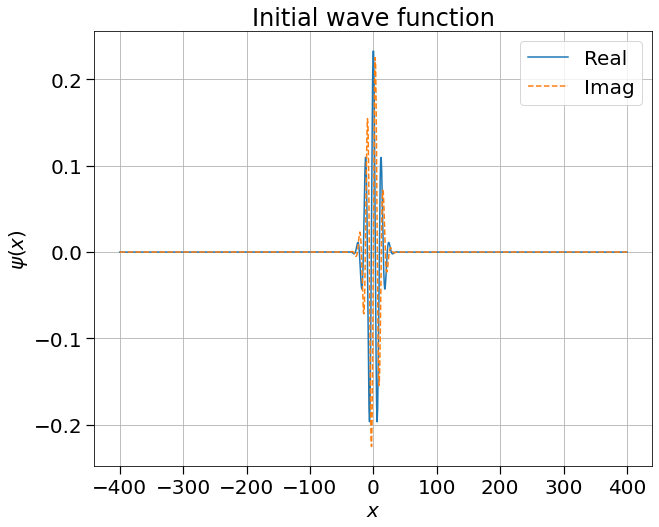

In [42]:
#* Plot the initial wavefunction
fig1 = figure(figsize=(10,8))
plot(x,real(psi),'-',label='Real')
plot(x,imag(psi),'--',label='Imag')
xlabel('$x$') 
ylabel('$\psi(x)$')
legend(loc='best')
title('Initial wave function')
grid('on')
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks

In [43]:
#* Initialize loop and plot variables 
max_iter = int(0.35*L/(velocity*dt)+0.5)       # Particle should circle system
# max_iter = int(L/(velocity*dt)+0.5)//5      # Particle should circle system

plot_iter = max_iter/8                    # Produce 8+1 curves
p_plot = empty((N,max_iter+1))         # Note that P(x,t) is real
p_plot[:,0] = absolute(psi[:])**2      # Record initial condition
iplot = 0
axisV = [-L/4, L, 0, 1.05*max(p_plot[:,0])]   # Fix axis min and max

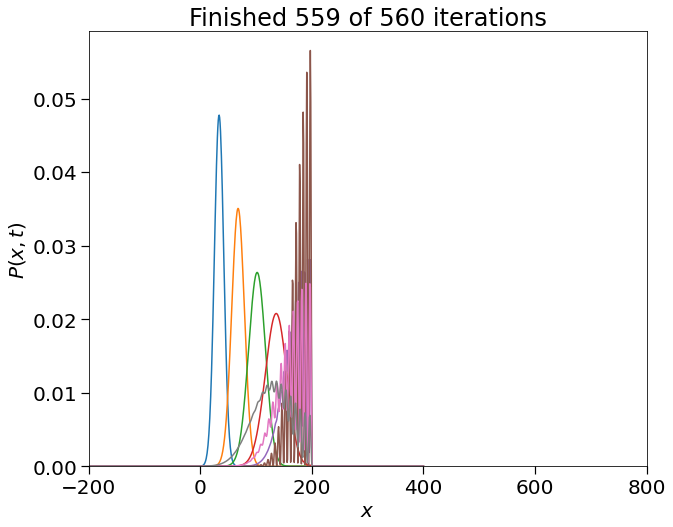

In [44]:
fig2 = figure(figsize=(10,8))
#* Loop over desired number of steps (wave circles system once)
for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = dCN @ psi
    
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = absolute(psi[:])**2 
        plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        xlabel('$x$')
        ylabel('$P(x,t)$')
        title('Finished %d of %d iterations' % (iter,max_iter))
        axis(axisV)
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks

In [45]:
num = conj(psi) @ ham @ psi
den = conj(psi) @ psi

exp_e = num/den

print('Final energy:', real(exp_e))
E_expect=(h_bar*k0)**2/(2*mass)
print('Expected energy:', E_expect)

Final energy: 0.1256393120015349
Expected energy: 0.125


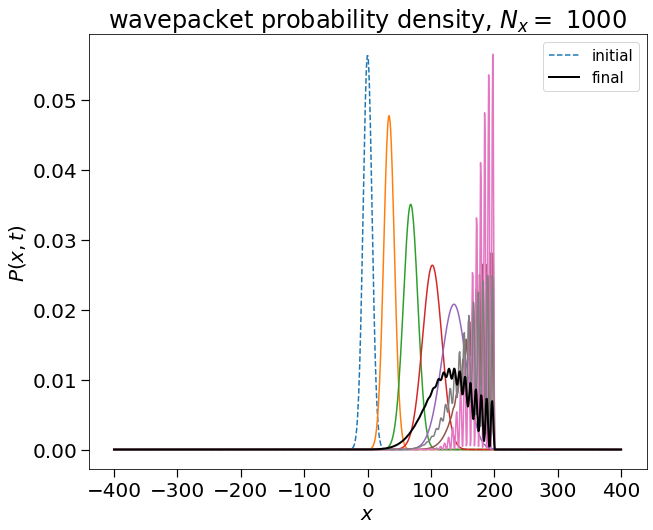

In [46]:
fig3 = figure(figsize=(10,8))
#* Plot probability versus position at various times
pFinal = empty(N)
pFinal = absolute(psi[:])**2
plot(x,p_plot[:,0],'--',label='initial')
for i in range(1,iplot) :
    plot(x,p_plot[:,i])
plot(x,p_plot[:,iplot],'k',lw='2',label='final')
# plot(x, pFinal, label ='final final')
xlabel('$x$')
ylabel('$P(x,t)$')
legend(loc='best',fontsize=15)
title('wavepacket probability density, $N_x = $ %d' % N)
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
#savefig('schro_fig3.png')

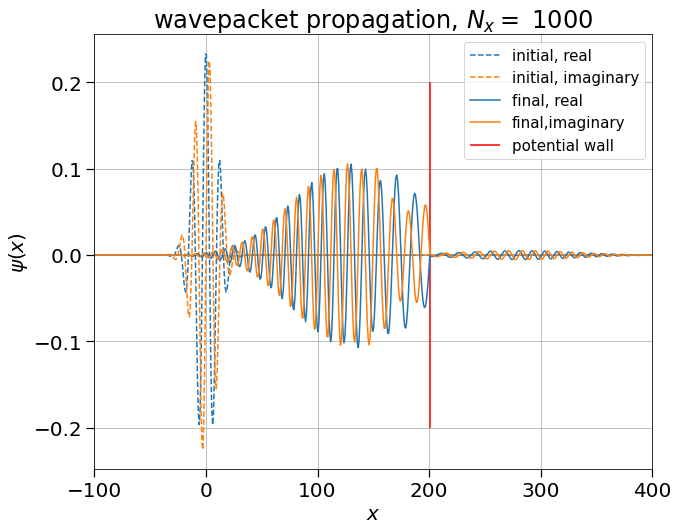

In [47]:
fig4 = figure(figsize=(10,8))
plot(x,real(psi0),'--',c='C0',label='initial, real')
plot(x,imag(psi0),'--',c='C1',label='initial, imaginary')
plot(x,real(psi),'-',c='C0',label='final, real')
plot(x,imag(psi),'-',c='C1',label='final,imaginary')
xlabel('$x$') 
ylabel('$\psi(x)$')
vlines(x[pos], -0.2, 0.2, color = 'r', label = 'potential wall')
legend(loc='best',fontsize=15)
title('wavepacket propagation, $N_x = $ %d' % N)
grid('on')
tick_params('both', length=8, width=1.2, which='major') # bigger axis ticks
#savefig('schro_fig4.png')
xlim([-100,400])
show()

The wave penetrates through the potential wall even though the energy of the wave is much smaller. 

In [14]:
# t= max_iter - 1 
# alpha = np.sqrt(sigma0**2 + i_imag*h_bar*t/mass)
# exact = sigma0/( abs(alpha)**2 * sqrt(pi))\
# * exp(-( sigma0/abs(alpha) )**4 * (x-x0-(h_bar*k0*t)/mass)**2 * 1/sigma0**2 )

In [15]:
# figure(figsize=(7,5))
# plot(x, pFinal, label ='Numerical')
# plot(x, exact, label = 'Exact')
# xlabel('$x$')
# ylabel('$P(x, t_{final})$')
# legend()
# show()